In [1]:
!ls -lha

total 16K
drwxr-xr-x 1 root root 4.0K Aug 27 16:17 .
drwxr-xr-x 1 root root 4.0K Oct  8 05:32 ..
drwxr-xr-x 1 root root 4.0K Sep 27 15:12 .config
drwxr-xr-x 1 root root 4.0K Aug 27 16:17 sample_data


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [3]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
!ls "/content/drive/My Drive/Waste-Classifier"

data_files  dataset-resized  models  notebooks	README.md  Untitled.ipynb


In [5]:
import os
os.getcwd()

'/content'

In [6]:
os.chdir("/content/drive/My Drive/Waste-Classifier")
os.getcwd()

'/content/drive/My Drive/Waste-Classifier'

In [0]:
import os
import cv2
from fastai.vision import *
from fastai.metrics import error_rate

In [8]:
data_dir = 'dataset-resized'
#data_path = os.path.join(root_dir,data_dir)
data_categories = os.listdir(data_dir)
print(data_categories)
#num_waste_cat = len()
len(data_categories)

['glass', 'plastic', 'paper', 'metal', 'trash', 'cardboard', '.DS_Store', 'models']


8

In [9]:
data_categories.remove('.DS_Store')
data_categories.remove('models')

print(data_categories)

['glass', 'plastic', 'paper', 'metal', 'trash', 'cardboard']


In [10]:
fnames = get_image_files(data_dir+'/metal')
fnames[:5]

[PosixPath('dataset-resized/metal/metal1.jpg'),
 PosixPath('dataset-resized/metal/metal103.jpg'),
 PosixPath('dataset-resized/metal/metal102.jpg'),
 PosixPath('dataset-resized/metal/metal100.jpg'),
 PosixPath('dataset-resized/metal/metal10.jpg')]

In [0]:
size = 224
bs = 64

In [0]:
data = ImageDataBunch.from_folder(data_dir, 
                                  ds_tfms=get_transforms(do_flip=True, flip_vert=True),
                                  valid_pct=0.2, 
                                  size=size, 
                                  bs=bs)

In [13]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2022 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glass,glass,glass,glass,glass
Path: dataset-resized;

Valid: LabelList (505 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
metal,metal,paper,paper,plastic
Path: dataset-resized;

Test: None

In [0]:
learner = cnn_learner(data, models.resnet18, metrics=[accuracy], callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


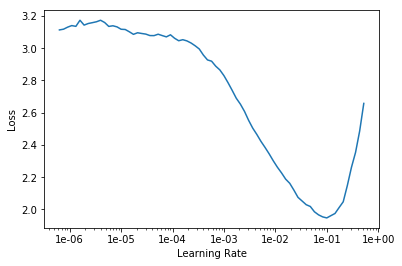

In [0]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.477201,0.798372,0.778218,02:15
1,1.027020,0.619858,0.798020,00:37
2,0.853641,0.568536,0.819802,00:36
3,0.716040,0.438652,0.873267,00:36
4,0.578609,0.347341,0.881188,00:36
5,0.469983,0.329463,0.887129,00:36
6,0.377266,0.331108,0.877228,00:36
7,0.330520,0.320257,0.875248,00:36


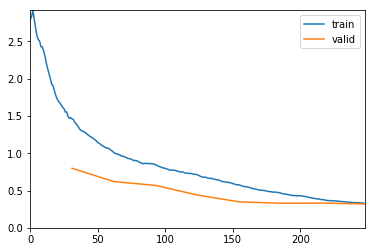

In [0]:
learner.fit_one_cycle(8, max_lr=slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.553654,0.671797,0.790099,00:37
1,1.110692,0.535035,0.843564,00:35
2,0.865620,0.595545,0.803960,00:36
3,0.732257,0.489790,0.851485,00:36
4,0.649830,0.550530,0.823762,00:36
5,0.575758,0.445323,0.889109,00:37
6,0.535767,0.452826,0.869307,00:36
7,0.482886,0.353293,0.891089,00:36
8,0.414484,0.327525,0.899010,00:35
9,0.360002,0.351047,0.895050,00:37


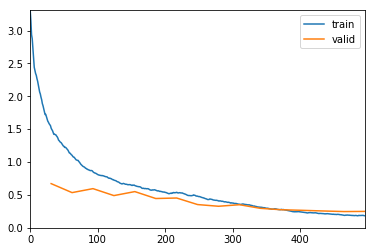

In [0]:
learner.fit_one_cycle(16, max_lr=slice(1e-3, 1e-2))

In [0]:
learner.save('stage-1')


epoch,train_loss,valid_loss,accuracy,time
0,0.162802,0.246555,0.918812,00:36
1,0.172489,0.237387,0.920792,00:36
2,0.180678,0.332874,0.891089,00:35
3,0.244428,0.375652,0.893069,00:36
4,0.319727,0.446485,0.881188,00:36
5,0.353735,0.397309,0.893069,00:36
6,0.350376,0.358861,0.899010,00:36
7,0.297730,0.356917,0.897030,00:36
8,0.259194,0.277507,0.916832,00:36
9,0.237494,0.271023,0.912871,00:36


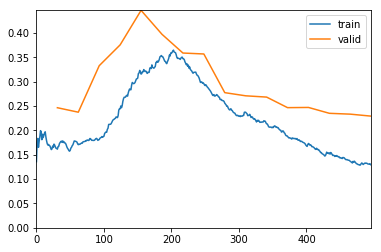

In [0]:
learner.load('stage-1')

learner.fit_one_cycle(16, max_lr=slice(1e-3, 1e-2))

In [0]:
learner.save('stage-2')

In [0]:
learner.load('/content/drive/My Drive/Waste-Classifier/models/stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (2022 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glass,glass,glass,glass,glass
Path: dataset-resized;

Valid: LabelList (505 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
paper,paper,plastic,metal,paper
Path: dataset-resized;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

In [0]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('cardboard', 'paper', 2), ('glass', 'plastic', 2), ('plastic', 'glass', 2)]

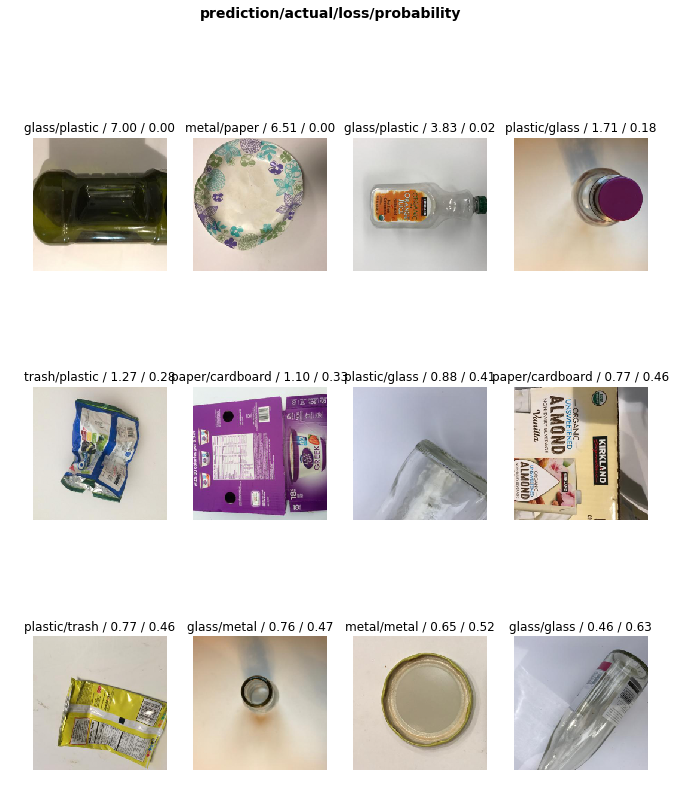

In [0]:
interpreter.plot_top_losses(12,figsize=(11,13))

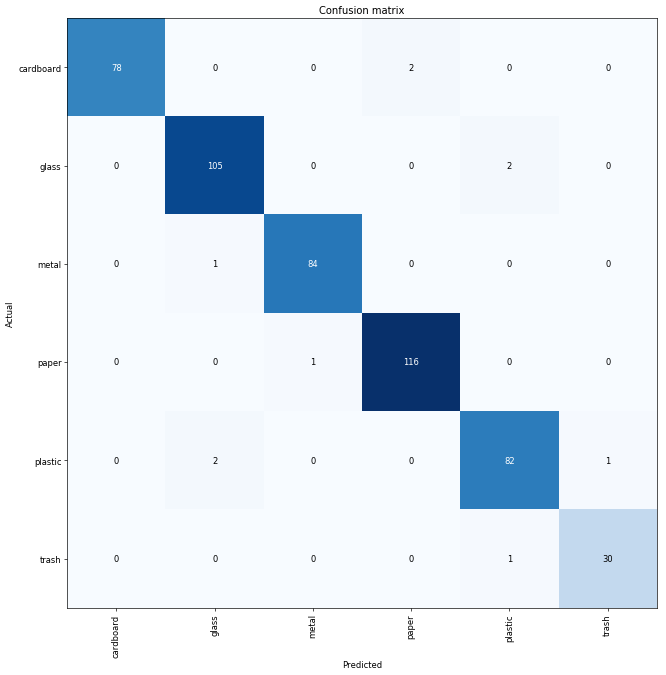

In [0]:
interpreter.plot_confusion_matrix(figsize=(11,13),dpi=60)

epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.175285,0.063569,0.980198,05:36
0,0.175285,0.063569,0.980198,05:36
1,0.147637,0.067801,0.980198,00:40
1,0.147637,0.067801,0.980198,00:40
2,0.142561,0.077099,0.976238,00:36
2,0.142561,0.077099,0.976238,00:36
3,0.140216,0.083594,0.976238,00:35
3,0.140216,0.083594,0.976238,00:35
4,0.142651,0.082232,0.976238,00:35


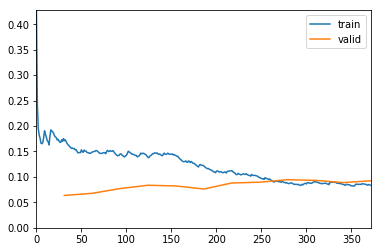

In [0]:
learner.unfreeze()
learner.fit_one_cycle(12, max_lr=slice(1e-5, 1e-4))

In [0]:
learner.save('/content/drive/My Drive/Waste-Classifier/models/stage-3')

In [0]:
learner.load('/content/drive/My Drive/Waste-Classifier/models/stage-3')

Learner(data=ImageDataBunch;

Train: LabelList (2022 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glass,glass,glass,glass,glass
Path: dataset-resized;

Valid: LabelList (505 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
paper,paper,plastic,metal,paper
Path: dataset-resized;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

In [0]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('plastic', 'glass', 4),
 ('cardboard', 'paper', 2),
 ('glass', 'metal', 2),
 ('glass', 'plastic', 2),
 ('metal', 'glass', 2)]

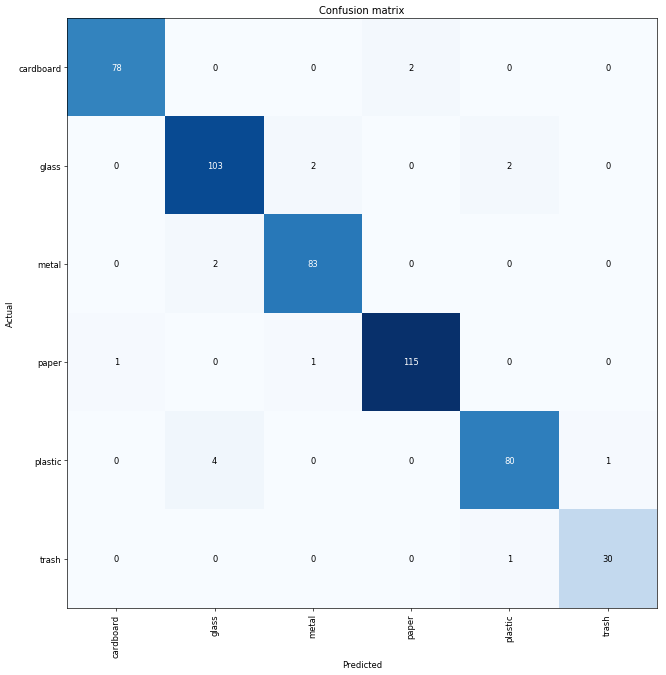

In [0]:
interpreter.plot_confusion_matrix(figsize=(11,13),dpi=60)

In [14]:
learner = cnn_learner(data, models.resnet18, metrics=[accuracy], callback_fns=ShowGraph)
learner.unfreeze()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 80.8MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.455883,0.893929,0.780198,06:01
1,0.968422,0.954911,0.762376,00:41
2,0.712989,0.542264,0.855446,00:38
3,0.530695,0.426804,0.897030,00:38
4,0.407337,0.344486,0.904950,00:38
5,0.316535,0.346279,0.910891,00:38
6,0.237425,0.348581,0.918812,00:38
7,0.183723,0.338864,0.908911,00:38


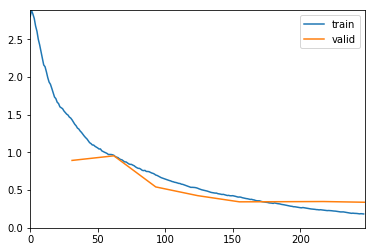

In [15]:
learner.fit_one_cycle(8, max_lr=slice(1e-5, 1e-2))